In [1]:
import numpy as np

X= np.random.rand(10,2)

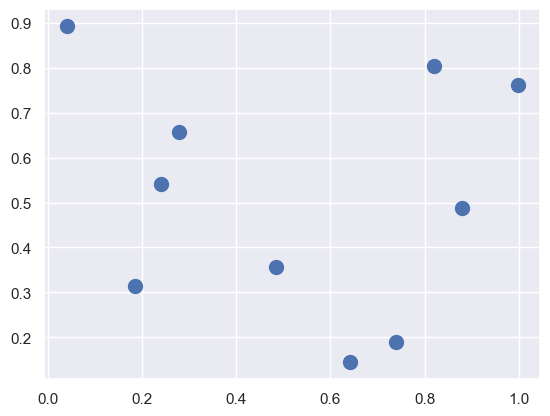

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

In [3]:
X

array([[0.64061489, 0.14490731],
       [0.24086585, 0.54082993],
       [0.73855496, 0.18834614],
       [0.27885357, 0.65740524],
       [0.1858616 , 0.31507375],
       [0.9982509 , 0.76181007],
       [0.87870811, 0.48880408],
       [0.81902105, 0.80459106],
       [0.040467  , 0.89298021],
       [0.48377986, 0.35664353]])

In [4]:
dist_sq= np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2, axis=-1)

In [6]:
#각 쌍의 점 사이의 좌표 차이를 계산함
differences= X[:, np.newaxis,:]-X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [7]:
#좌표 차이를 제곱함
sq_differences= differences**2
sq_differences.shape

(10, 10, 2)

In [8]:
dist_sq= sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [9]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
nearest= np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 9 6 4 1 3 7 5 8]
 [1 3 4 9 8 0 2 7 6 5]
 [2 0 9 6 4 1 7 5 3 8]
 [3 1 8 4 9 7 6 0 2 5]
 [4 1 9 3 0 2 8 6 7 5]
 [5 7 6 2 9 0 3 1 4 8]
 [6 5 7 2 9 0 3 1 4 8]
 [7 5 6 9 3 2 1 0 8 4]
 [8 3 1 4 9 7 6 0 5 2]
 [9 0 4 1 2 3 6 7 5 8]]


In [11]:
K=2
nearest_partition= np.argpartition(dist_sq, K+1, axis=1)

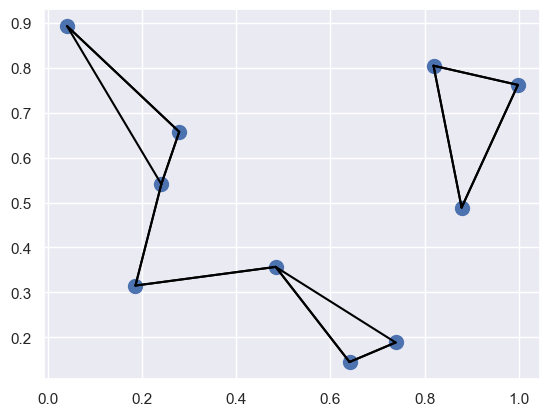

In [12]:
plt.scatter(X[:,0], X[:,1], s=100)

#각 점을 두 개의 가장 가까운 이웃과 선으로 이음
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        #X[i]부터 X[j]까지 선으로 이음
        #zip 매직 함수를 이용
        plt.plot(*zip(X[i],X[j]), color='black')